<a href="https://colab.research.google.com/github/RFOXgithub/Sistem-Rekomendasi-Pengelolaan-Produk/blob/main/Final_Project_Model_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/RFOXgithub/Sistem-Rekomendasi-Pengelolaan-Produk/blob/main/Final_Project_Model_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv(r'final-project/data-final-project-cleaned-atribut-extend.csv')

In [ ]:
#Dynamic Pricing Model

In [ ]:
#Skenario Perbandingan Model

dfDPM = df.drop(columns=['nama_produk', 'desc', 'store', 'kategori', 'sub_kategori', 'harga_kategori'], errors='ignore')
X = dfDPM[['avg_harga_per_kategori', 'harga_per_rating', 'harga_terjual']]
y = dfDPM['harga_kategori_encoding']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_modelPrice = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=4, max_features='sqrt', min_samples_split=5, min_samples_leaf=5, n_estimators=300)
rf_modelPrice.fit(X_train, y_train)

lr_modelPrice = LogisticRegression(C=1, max_iter=1000, penalty='l2', solver='lbfgs')
lr_modelPrice.fit(X_train, y_train)

svm_modelPrice = SVC()
svm_modelPrice.fit(X_train, y_train)

knn_modelPrice = KNeighborsClassifier(n_neighbors=15, p=2, weights='uniform')
knn_modelPrice.fit(X_train, y_train)

xgb_modelPrice = XGBClassifier(objective='multi:softprob', learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8, colsample_bytree=0.8)
xgb_modelPrice.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Clasification Report Testing and Training Evaluation
models = {'Random Forest': rf_modelPrice, 'Logistic Regression': lr_modelPrice, 'SVM': svm_modelPrice, 'KNN': knn_modelPrice, 'XGBoost': xgb_modelPrice}

for model_name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"{model_name} - Training Data Evaluation:")
    print(classification_report(y_train, y_train_pred, zero_division=1))

    print(f"{model_name} - Testing Data Evaluation:")
    print(classification_report(y_test, y_test_pred, zero_division=1))

Random Forest - Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       235
           1       0.85      0.70      0.77       166
           2       0.95      0.94      0.95       215

    accuracy                           0.88       616
   macro avg       0.88      0.87      0.87       616
weighted avg       0.88      0.88      0.88       616

Random Forest - Testing Data Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       115
           1       0.65      0.62      0.64        48
           2       0.93      0.95      0.94       101

    accuracy                           0.87       264
   macro avg       0.83      0.82      0.83       264
weighted avg       0.87      0.87      0.87       264

Logistic Regression - Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       23

In [ ]:
#Cross Validation Evaluation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{model_name} - Cross-validation scores: {cv_scores}')
    print(f'{model_name} - Mean CV score: {np.mean(cv_scores)}\n')

Random Forest - Cross-validation scores: [0.7983871  0.77235772 0.82113821 0.83739837 0.82113821]
Random Forest - Mean CV score: 0.8100839234198794

Logistic Regression - Cross-validation scores: [0.58870968 0.59349593 0.60162602 0.52845528 0.57723577]
Logistic Regression - Mean CV score: 0.5779045371098872

SVM - Cross-validation scores: [0.56451613 0.52845528 0.62601626 0.53658537 0.54471545]
SVM - Mean CV score: 0.5600576973511672

KNN - Cross-validation scores: [0.60483871 0.50406504 0.65853659 0.59349593 0.53658537]
KNN - Mean CV score: 0.5795043273013376

XGBoost - Cross-validation scores: [0.79032258 0.82113821 0.82113821 0.86178862 0.8699187 ]
XGBoost - Mean CV score: 0.8328612640965118



In [ ]:
#Confusion Matrix Evaluation
predictions = pd.DataFrame({
    'Actual': y_test,
    'Random Forest': rf_modelPrice.predict(X_test),
    'Logistic Regression': lr_modelPrice.predict(X_test),
    'SVM': svm_modelPrice.predict(X_test),
    'KNN': knn_modelPrice.predict(X_test),
    'XGBoost': xgb_modelPrice.predict(X_test)
})

for model_name in models.keys():
    print(f"Crosstab for {model_name}:")
    crosstab = pd.crosstab(predictions['Actual'], predictions[model_name], margins=True)
    print(crosstab)
    print("\n")

Crosstab for Random Forest:
Random Forest    0   1    2  All
Actual                          
0              103  12    0  115
1               11  30    7   48
2                1   4   96  101
All            115  46  103  264


Crosstab for Logistic Regression:
Logistic Regression   0   1    2  All
Actual                               
0                    64  17   34  115
1                    14   6   28   48
2                     4   8   89  101
All                  82  31  151  264


Crosstab for SVM:
SVM       0   1   2  All
Actual                  
0       111   2   2  115
1        36   3   9   48
2        47  14  40  101
All     194  19  51  264


Crosstab for KNN:
KNN       0   1   2  All
Actual                  
0        90  13  12  115
1        23  10  15   48
2        22  25  54  101
All     135  48  81  264


Crosstab for XGBoost:
XGBoost    0   1   2  All
Actual                   
0         98  17   0  115
1         10  32   6   48
2          0   9  92  101
All      108  58

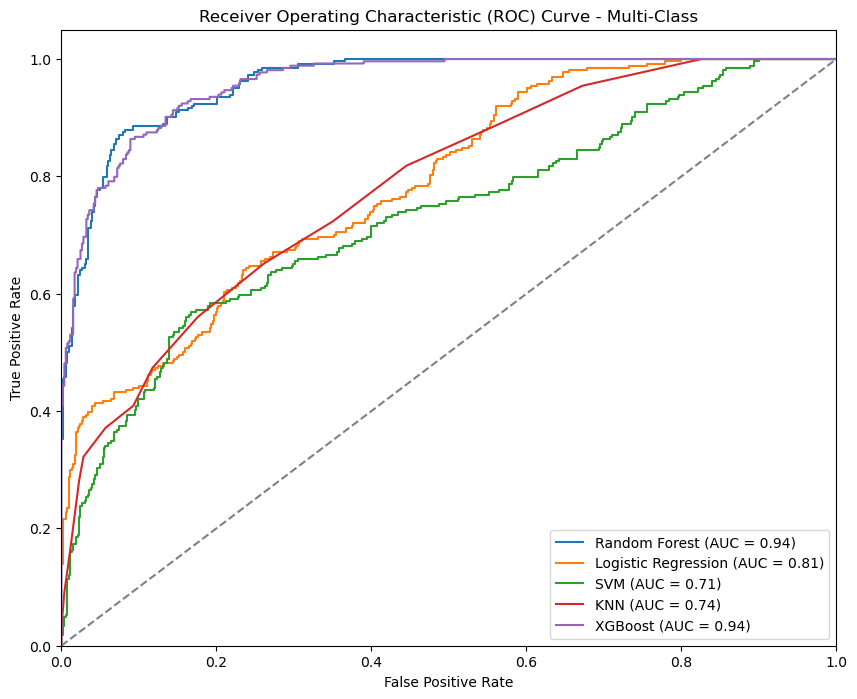

In [ ]:
#ROC AUC Evaluation
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train, y_train)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Product Restock Prediction Model

In [ ]:
#Product Restock Prediction Model

In [ ]:
#Product Restock Prediction Model

In [ ]:
#Product Restock Prediction Model

In [ ]:
#Product Restock Prediction Model

In [ ]:
#Product Restock Prediction Model

In [ ]:
#Product Restock Prediction Model

In [ ]:
#Product Restock Prediction Model

In [ ]:
#Product Restock Prediction Model

In [ ]:
#Product Restock Prediction Model

In [ ]:
#Skenario Perbandingan Model

dfDPM = df.drop(columns=['nama_produk', 'desc', 'store', 'kategori', 'sub_kategori', 'harga_kategori', 'restock', 'popularitas'], errors='ignore')
X = dfDPM[['stok_ideal','stok_terjual_ratio', 'rasio_penjualan_stok']]
y = dfDPM['restock_encoding']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampleds, y_train_resampleds = smote.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampleds, y_train_resampleds)

rf_modelStock = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=4, max_features='sqrt', min_samples_split=5, min_samples_leaf=5, n_estimators=300)
rf_modelStock.fit(X_train_resampled, y_train_resampled)

lr_modelStock = LogisticRegression(C=1, max_iter=1000, penalty='l2', solver='lbfgs')
lr_modelStock.fit(X_train_resampled, y_train_resampled)

svm_modelStock = SVC()
svm_modelStock.fit(X_train_resampled, y_train_resampled)

knn_modelStock = KNeighborsClassifier(n_neighbors=15, p=2, weights='uniform')
knn_modelStock.fit(X_train_resampled, y_train_resampled)

xgb_modelStock = XGBClassifier(objective='multi:softprob', learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8, colsample_bytree=0.8)
xgb_modelStock.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Clasification Report Testing and Training Evaluation
models = {'Random Forest': rf_modelStock, 'Logistic Regression': lr_modelStock, 'SVM': svm_modelStock, 'KNN': knn_modelStock, 'XGBoost': xgb_modelStock}

for model_name, model in models.items():
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)

    print(f"{model_name} - Training Data Evaluation:")
    print(classification_report(y_train_resampled, y_train_pred, zero_division=1))

    print(f"{model_name} - Testing Data Evaluation:")
    print(classification_report(y_test, y_test_pred, zero_division=1))

Random Forest - Training Data Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       0.92      0.82      0.87       438
           2       0.84      0.92      0.88       438

    accuracy                           0.91      1314
   macro avg       0.92      0.91      0.91      1314
weighted avg       0.92      0.91      0.91      1314

Random Forest - Testing Data Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.56      0.75      0.64        32
           2       0.95      0.90      0.93       186

    accuracy                           0.90       264
   macro avg       0.84      0.88      0.86       264
weighted avg       0.91      0.90      0.90       264

Logistic Regression - Training Data Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       43

In [ ]:
#Cross Validation Evaluation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print(f'{model_name} - Cross-validation scores: {cv_scores}')
    print(f'{model_name} - Mean CV score: {np.mean(cv_scores)}\n')

Random Forest - Cross-validation scores: [0.878327   0.92395437 0.93155894 0.92015209 0.87022901]
Random Forest - Mean CV score: 0.9048442806141701

Logistic Regression - Cross-validation scores: [0.79847909 0.79467681 0.80988593 0.80228137 0.77862595]
Logistic Regression - Mean CV score: 0.7967898296229647

SVM - Cross-validation scores: [0.60076046 0.57414449 0.57034221 0.57034221 0.57633588]
SVM - Mean CV score: 0.5783850462949525

KNN - Cross-validation scores: [0.8365019  0.81368821 0.80988593 0.81749049 0.85114504]
KNN - Mean CV score: 0.8257423156183787

XGBoost - Cross-validation scores: [0.93155894 0.93536122 0.9391635  0.95057034 0.94656489]
XGBoost - Mean CV score: 0.9406437755783241



In [ ]:
#Confusion Matrix Evaluation
predictions = pd.DataFrame({
    'Actual': y_test,
    'Random Forest': rf_modelStock.predict(X_test),
    'Logistic Regression': lr_modelStock.predict(X_test),
    'SVM': svm_modelStock.predict(X_test),
    'KNN': knn_modelStock.predict(X_test),
    'XGBoost': xgb_modelStock.predict(X_test)
})

for model_name in models.keys():
    print(f"Crosstab for {model_name}:")
    crosstab = pd.crosstab(predictions['Actual'], predictions[model_name], margins=True)
    print(crosstab)
    print("\n")

Crosstab for Random Forest:
Random Forest   0   1    2  All
Actual                         
0              46   0    0   46
1               0  24    8   32
2               0  19  167  186
All            46  43  175  264


Crosstab for Logistic Regression:
Logistic Regression   0   1    2  All
Actual                               
0                    45   1    0   46
1                     0  20   12   32
2                     0  34  152  186
All                  45  55  164  264


Crosstab for SVM:
SVM      0   1    2  All
Actual                  
0       20   0   26   46
1        1   8   23   32
2        4   5  177  186
All     25  13  226  264


Crosstab for KNN:
KNN      0   1    2  All
Actual                  
0       42   2    2   46
1        3  22    7   32
2       17  45  124  186
All     62  69  133  264


Crosstab for XGBoost:
XGBoost   0   1    2  All
Actual                   
0        46   0    0   46
1         0  25    7   32
2         0  25  161  186
All      46  50  168  

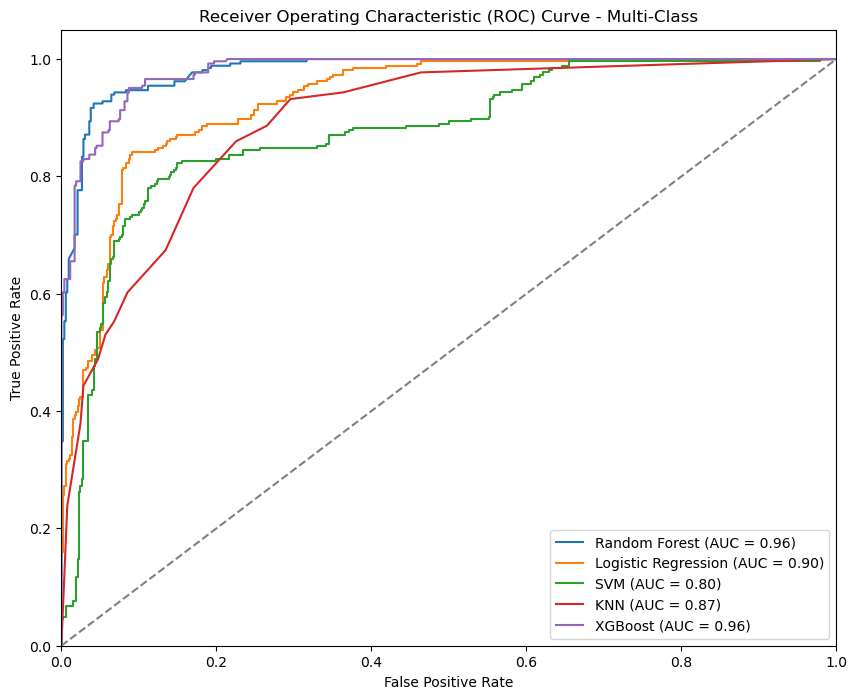

In [ ]:
#ROC AUC Evaluation
y_train_bin = label_binarize(y_train_resampled, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Product Popularity Prediction Model

In [ ]:
#Product Popularity Prediction Model

In [ ]:
#Product Popularity Prediction Model

In [ ]:
#Product Popularity Prediction Model

In [ ]:
#Product Popularity Prediction Model

In [ ]:
#Product Popularity Prediction Model

In [ ]:
#Product Popularity Prediction Model

In [ ]:
#Product Popularity Prediction Model

In [ ]:
#Product Popularity Prediction Model

In [ ]:
#Product Popularity Prediction Model

In [ ]:
#Skenario Perbandingan Model

dfDPM = df.drop(columns=['nama_produk', 'desc', 'store', 'kategori', 'sub_kategori', 'harga_kategori', 'restock', 'popularitas'], errors='ignore')
X = dfDPM[['harga_per_rating', 'rasio_penjualan_stok', 'total_rating']]
#X = dfDPM.drop(columns=['popularitas_encoding'])
y = dfDPM['popularitas_encoding']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampleds, y_train_resampleds = smote.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampleds, y_train_resampleds)

rf_modelPopu = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=4, max_features='sqrt', min_samples_split=5, min_samples_leaf=5, n_estimators=300)
rf_modelPopu.fit(X_train_resampled, y_train_resampled)

lr_modelPopu = LogisticRegression(C=1, max_iter=1000, penalty='l2', solver='lbfgs')
lr_modelPopu.fit(X_train_resampled, y_train_resampled)

svm_modelPopu = SVC()
svm_modelPopu.fit(X_train_resampled, y_train_resampled)

knn_modelPopu = KNeighborsClassifier(n_neighbors=15, p=2, weights='uniform')
knn_modelPopu.fit(X_train_resampled, y_train_resampled)

xgb_modelPopu = XGBClassifier(objective='multi:softprob', learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8, colsample_bytree=0.8)
xgb_modelPopu.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Clasification Report Testing and Training Evaluation
models = {'Random Forest': rf_modelPopu, 'Logistic Regression': lr_modelPopu, 'SVM': svm_modelPopu, 'KNN': knn_modelPopu, 'XGBoost': xgb_modelPopu}

for model_name, model in models.items():
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)

    print(f"{model_name} - Training Data Evaluation:")
    print(classification_report(y_train_resampled, y_train_pred, zero_division=1))

    print(f"{model_name} - Testing Data Evaluation:")
    print(classification_report(y_test, y_test_pred, zero_division=1))

Random Forest - Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       588
           1       0.88      0.98      0.92       588
           2       1.00      0.98      0.99       588

    accuracy                           0.94      1764
   macro avg       0.95      0.94      0.94      1764
weighted avg       0.95      0.94      0.94      1764

Random Forest - Testing Data Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.36      0.67      0.47         6
           2       1.00      0.98      0.99       249

    accuracy                           0.97       264
   macro avg       0.72      0.84      0.77       264
weighted avg       0.98      0.97      0.97       264

Logistic Regression - Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       58

In [ ]:
#Cross Validation Evaluation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print(f'{model_name} - Cross-validation scores: {cv_scores}')
    print(f'{model_name} - Mean CV score: {np.mean(cv_scores)}\n')

Random Forest - Cross-validation scores: [0.93767705 0.89518414 0.9490085  0.91784703 0.94602273]
Random Forest - Mean CV score: 0.9291478882307495

Logistic Regression - Cross-validation scores: [0.91784703 0.898017   0.94050992 0.91501416 0.93181818]
Logistic Regression - Mean CV score: 0.9206412567602369

SVM - Cross-validation scores: [0.60339943 0.6203966  0.6203966  0.63456091 0.64204545]
SVM - Mean CV score: 0.6241597991243883

KNN - Cross-validation scores: [0.76203966 0.79036827 0.72521246 0.76487252 0.76704545]
KNN - Mean CV score: 0.7619076744784959

XGBoost - Cross-validation scores: [0.97167139 0.9490085  0.97167139 0.93767705 0.96022727]
XGBoost - Mean CV score: 0.9580511202678341



In [ ]:
#Confusion Matrix Evaluation
predictions = pd.DataFrame({
    'Actual': y_test,
    'Random Forest': rf_modelPopu.predict(X_test),
    'Logistic Regression': lr_modelPopu.predict(X_test),
    'SVM': svm_modelPopu.predict(X_test),
    'KNN': knn_modelPopu.predict(X_test),
    'XGBoost': xgb_modelPopu.predict(X_test)
})

for model_name in models.keys():
    print(f"Crosstab for {model_name}:")
    crosstab = pd.crosstab(predictions['Actual'], predictions[model_name], margins=True)
    print(crosstab)
    print("\n")

Crosstab for Random Forest:
Random Forest   0   1    2  All
Actual                         
0               8   1    0    9
1               2   4    0    6
2               0   6  243  249
All            10  11  243  264


Crosstab for Logistic Regression:
Logistic Regression   0   1    2  All
Actual                               
0                     9   0    0    9
1                     1   5    0    6
2                     1   7  241  249
All                  11  12  241  264


Crosstab for SVM:
SVM     0   1    2  All
Actual                 
0       3   5    1    9
1       1   4    1    6
2       1  20  228  249
All     5  29  230  264


Crosstab for KNN:
KNN      0   1    2  All
Actual                  
0        6   3    0    9
1        2   4    0    6
2       16  48  185  249
All     24  55  185  264


Crosstab for XGBoost:
XGBoost   0  1    2  All
Actual                  
0         8  1    0    9
1         2  4    0    6
2         1  2  246  249
All      11  7  246  264




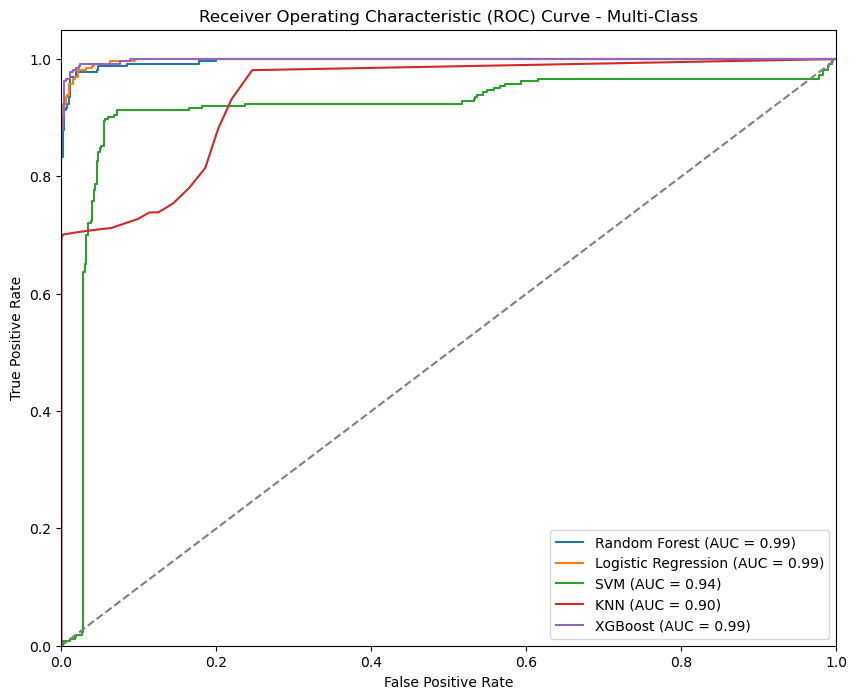

In [ ]:
#ROC AUC Evaluation
y_train_bin = label_binarize(y_train_resampled, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Feature and Corellation Check

In [ ]:
#Feature and Corellation Check

In [ ]:
#Feature and Corellation Check

In [ ]:
#Feature and Corellation Check

In [ ]:
#Feature and Corellation Check

In [ ]:
#Feature and Corellation Check

In [ ]:
#Feature and Corellation Check

In [ ]:
#Feature and Corellation Check

In [ ]:
#Feature and Corellation Check

In [ ]:
#Feature and Corellation Check

Rekomendasi Fitur Berdasarkan Pentingnya:
                    Feature  Importance
9          skor_popularitas    0.447569
1                   terjual    0.204315
2              total_rating    0.125786
7          harga_per_rating    0.070535
11       stok_terjual_ratio    0.033388
13     rasio_penjualan_stok    0.029788
8             harga_terjual    0.016211
0                     harga    0.015924
12               stok_ideal    0.013444
3                avg_rating    0.012385
6     sub_kategori_encoding    0.012245
4                     stock    0.006758
15         restock_encoding    0.004937
10   avg_harga_per_kategori    0.003065
14  harga_kategori_encoding    0.002635
5         kategori_encoding    0.001015


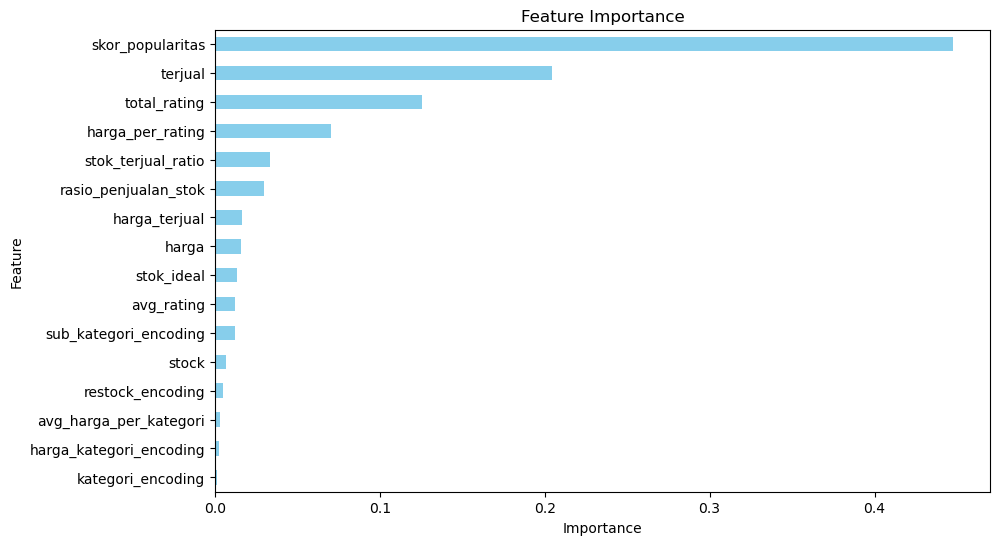

In [ ]:
X = dfDPM.drop(columns=['popularitas_encoding'])
y = dfDPM['popularitas_encoding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Rekomendasi Fitur Berdasarkan Pentingnya:")
print(feature_df)

feature_df.plot.barh(x='Feature', y='Importance', color='skyblue', figsize=(10, 6), legend=False)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
correlation_matrix = dfDPM.corr()

print(correlation_matrix['popularitas_encoding'].sort_values(ascending=False))

popularitas_encoding       1.000000
restock_encoding           0.334069
total_rating               0.172224
skor_popularitas           0.160989
terjual                    0.141456
kategori_encoding          0.124854
rasio_penjualan_stok       0.077264
harga_terjual              0.055581
stock                      0.053922
sub_kategori_encoding     -0.066250
stok_ideal                -0.114895
avg_harga_per_kategori    -0.139008
avg_rating                -0.144800
harga                     -0.152826
harga_kategori_encoding   -0.170760
stok_terjual_ratio        -0.253762
harga_per_rating          -0.527401
Name: popularitas_encoding, dtype: float64


In [ ]:
#Model digunakan dipilih
rf_modelPrice #Menentukan harga dinamis
rf_modelStock #Menentukan stock ideal
xgb_modelPopu #Menentukan popularitas produk

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Eksport Model
import pickle

pickle_out = open("rf_modelPrice.pkl", "wb")
pickle.dump(rf_modelPrice, pickle_out)
pickle_out.close()

In [ ]:
#Eksport Model
import pickle

pickle_out = open("rf_modelStock.pkl", "wb")
pickle.dump(rf_modelStock, pickle_out)
pickle_out.close()

In [ ]:
#Eksport Model
import pickle

pickle_out = open("rf_modelPopu.pkl", "wb")
pickle.dump(rf_modelPopu, pickle_out)
pickle_out.close()

In [ ]:
import pickle
import pandas as pd
import numpy as np

with open('rf_modelStock.pkl', 'rb') as f:
    rf_modelStock = pickle.load(f)

with open('rf_modelPrice.pkl', 'rb') as f:
    rf_modelPrice = pickle.load(f)

with open('xgb_modelPopu.pkl', 'rb') as f:
    xgb_modelPopu = pickle.load(f)

# Data utama
data_utama = {
    'nama_produk': ['Produk A', 'Produk B', 'Produk C', 'Produk D'],
    'kategori': [1, 2, 1, 5],
    'harga': [4334431, 50000, 80000, 35000],
    'total_rating': [1, 50, 300, 20],
    'terjual': [2, 20, 150, 5],
    'stock': [9990, 30, 5, 500]
}

df = pd.DataFrame(data_utama)

# Menambah kolom fitur
df['avg_harga_per_kategori'] = df.groupby('kategori')['harga'].transform('mean')
df['harga_per_rating'] = df['harga'] / (df['total_rating'] + 1)
df['harga_terjual'] = df['harga'] * df['terjual']
df['rasio_penjualan_stok'] = df['terjual'] / (df['stock'] + 1)
df['stok_terjual_ratio'] = df['stock'] / (df['terjual'] + 1)
df['stok_ideal'] = df['stok_terjual_ratio'] * df['stock']
df['stok_ideal'] = np.ceil(df['stok_ideal'])

# Prediksi menggunakan model
df['harga_kategori_encoding'] = rf_modelPrice.predict(df[['avg_harga_per_kategori', 'harga_per_rating', 'harga_terjual']])
df['restock_encoding'] = rf_modelStock.predict(df[['stok_ideal','stok_terjual_ratio', 'rasio_penjualan_stok']])
df['popularitas_encoding'] = rf_modelPopu.predict(df[['harga_per_rating', 'rasio_penjualan_stok', 'total_rating']])

# Mapping hasil prediksi ke kategori
harga_kategori_mapping = {0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'}
restock_mapping = {1: 'Tidak Restock', 2: 'Restock', 0: 'Stok Berlebih'}
popularitas_mapping = {0: 'Tidak Populer', 1: 'Populer', 2: 'Sangat Populer'}

df['harga_kategori'] = df['harga_kategori_encoding'].map(harga_kategori_mapping)
df['restock'] = df['restock_encoding'].map(restock_mapping)
df['popularitas'] = df['popularitas_encoding'].map(popularitas_mapping)

# Fungsi rekomendasi
def rekomendasi(row):
    if row['restock'] == 'Restock':
        return "Segera lakukan restock produk ini."
    elif row['harga_kategori'] == 'Tinggi' and row['popularitas'] == 'Sangat Populer':
        return "Lakukan promosi pada produk populer ini."
    elif row['restock'] == 'Tidak Restock' and row['harga_kategori'] == 'Rendah':
        return "Evaluasi produk untuk diskon atau hapus dari katalog."
    elif row['popularitas'] == 'Tidak Populer' and row['restock'] == 'Stok Berlebih':
        return "Tunda restock produk ini dan evaluasi penjualannya."
    elif row['popularitas'] == 'Populer' and row['harga_kategori'] == 'Sedang':
        return "Pertahankan produk dengan harga dan popularitas saat ini."
    else:
        return "Pertahankan strategi saat ini."

df['Rekomendasi'] = df.apply(rekomendasi, axis=1)

# Hasil
df[['nama_produk', 'harga_kategori', 'restock', 'popularitas', 'Rekomendasi']]

,nama_produk,harga_kategori,restock,popularitas,Rekomendasi
0,Produk A,Tinggi,Stok Berlebih,Tidak Populer,Tunda restock produk ini dan evaluasi penjuala...
1,Produk B,Rendah,Stok Berlebih,Sangat Populer,Pertahankan strategi saat ini.
2,Produk C,Rendah,Restock,Sangat Populer,Segera lakukan restock produk ini.
3,Produk D,Rendah,Stok Berlebih,Sangat Populer,Pertahankan strategi saat ini.
